In [80]:
#For Data loading and preprocessing
import pandas as pd

#For matrix operations
import numpy as np

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For splitting the data
from sklearn.model_selection import train_test_split

#For data preprocessing
from sklearn.preprocessing import StandardScaler

#For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#For appling LogisticRegression
from sklearn.linear_model import LogisticRegression

#For math operations
import math 

#To see the progress of the iterations
#from tqdm import tqdm

#Performance metrices
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix

#For encoding the features
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

print("Total no.of points = {}".format(data.shape[0]))
data.head(5)

Total no.of points = 8425


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
#Points to notice:

#There are missing values in the dataset
#Dataset includes numeric and categorical values

In [7]:
#1. Exploratory Data Analysis

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [10]:
# Many Null values in the data -filling with proper values

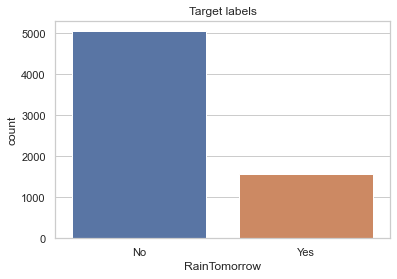

In [11]:
sns.set(style="whitegrid")
sns.countplot(data.RainTomorrow)
plt.title("Target labels")
plt.show()

In [12]:
#Data set is imbalanced

In [13]:
#Separating the data based on its class label.
d_y = data[data['RainTomorrow']=='Yes']
d_n = data[data['RainTomorrow']=='No']

In [14]:
#Most occuring values in every column in both cases

In [15]:
#Mode for all columns when RainTomorrow = Yes  
mode_y = d_y.mode()
mode_y

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-03-14,PerthAirport,13.2,19.0,0.0,2.6,0.0,N,37.0,N,...,91.0,67.0,1014.1,1011.1,8.0,8.0,14.8,17.0,No,Yes
1,2009-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2009-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2009-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2009-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Mode for all columns when RainTomorrow = No  
mode_n = d_n.mode()
mode_n

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2011-01-21,PerthAirport,12.0,20.0,0.0,4.0,11.0,E,35.0,SW,...,68.0,49.0,1020.0,1017.8,1.0,1.0,18.0,19.2,No,No
1,2011-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
d_n['MaxTemp'].median()

24.1

In [18]:
#Replacing NaN with its respective mode value in Temparatures Due to cannot replace NaN values with 0
d_y['MinTemp'].fillna(value=d_y['MinTemp'].mode()[0],inplace=True )
d_n['MinTemp'].fillna(value=d_n['MinTemp'].mode()[0],inplace=True )

d_y['MaxTemp'].fillna(value=d_y['MaxTemp'].mode()[0],inplace=True )
d_n['MaxTemp'].fillna(value=d_n['MaxTemp'].mode()[0],inplace=True )


d_y['Temp9am'].fillna(value=d_y['Temp9am'].mode()[0],inplace=True )
d_n['Temp9am'].fillna(value=d_n['Temp9am'].mode()[0],inplace=True )

d_y['Temp3pm'].fillna(value=d_y['Temp3pm'].mode()[0],inplace=True )
d_n['Temp3pm'].fillna(value=d_n['Temp3pm'].mode()[0],inplace=True )


# Humidity-Replacing NaN with its respective mode value
d_y['Humidity9am'].fillna(value=d_y['Humidity9am'].mode()[0],inplace=True )
d_n['Humidity9am'].fillna(value=d_n['Humidity9am'].mode()[0],inplace=True )



d_y['Humidity3pm'].fillna(value=d_y['Humidity3pm'].mode()[0],inplace=True )
d_n['Humidity3pm'].fillna(value=d_n['Humidity3pm'].mode()[0],inplace=True )

# Rain fall replacing NaN with 0.0 for no rainfall
d_y['Rainfall'].fillna(value=0.0,inplace=True)
d_n['Rainfall'].fillna(value=0.0,inplace=True)

d_y['Pressure9am'].fillna(value=d_y['Pressure9am'].median(),inplace=True )
d_n['Pressure9am'].fillna(value=d_n['Pressure9am'].median(),inplace=True )

d_y['Pressure3pm'].fillna(value=d_y['Pressure3pm'].median(),inplace=True )
d_n['Pressure3pm'].fillna(value=d_n['Pressure3pm'].median(),inplace=True )


d_y['WindSpeed9am'].fillna(value=d_y['WindSpeed9am'].median(),inplace=True )
d_n['WindSpeed9am'].fillna(value=d_n['WindSpeed9am'].median(),inplace=True )

d_y['WindSpeed3pm'].fillna(value=d_y['WindSpeed3pm'].median(),inplace=True )
d_n['WindSpeed3pm'].fillna(value=d_n['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed-replacing with median
d_y['WindGustSpeed'].fillna(value=d_y['WindGustSpeed'].median(),inplace=True)
d_n['WindGustSpeed'].fillna(value=d_n['WindGustSpeed'].median(),inplace=True)

In [19]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values 
d_y.dropna(inplace=True)
d_n.dropna(inplace=True)

In [20]:
data_filled= d_y.append(d_n, ignore_index=True)

In [21]:
data_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [22]:
print("Percentage of removed points= {}%".format(100.00-(len(data_filled)*100/len(data))))

Percentage of removed points= 53.519668737060044%


In [23]:
# sorting the data-Time based splitting
data_filled=data_filled.sort_values(by='Date')

In [24]:
# removing  data and loaction  
data_final = data_filled.drop(['Date', 'Location'], axis=1)

In [25]:
data_final.shape

(3143, 21)

In [26]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in data_final.columns:
    if data_final[i].dtypes=='object':
        data_final[i]=l.fit_transform(data_final[i].values)

In [27]:
  data_final.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.8,27.1,24.4,8.6,9.0,2,35.0,12,2,17.0,...,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,1,1
1,18.7,25.6,6.8,3.8,3.4,0,33.0,12,8,17.0,...,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,1,1
719,16.5,25.5,16.8,2.8,6.1,15,19.0,15,2,6.0,...,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,1,0
720,18.5,26.9,0.0,3.2,11.0,1,30.0,12,1,7.0,...,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,0,0
2,18.2,28.2,0.0,6.8,9.0,5,50.0,6,4,13.0,...,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,0,1


In [28]:
#Using LabelEncoder

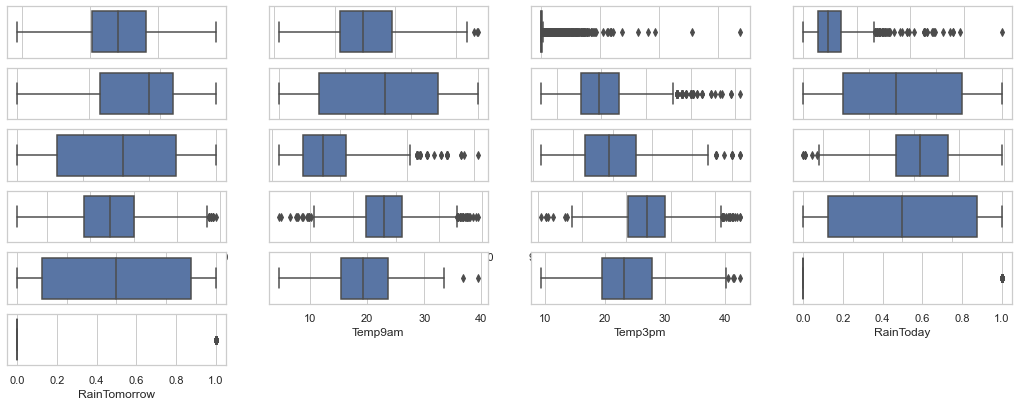

In [29]:
plt.figure(figsize=(18,10))
for o in enumerate(data_final):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(data_final[o[1]])

In [30]:
#as we can see that,Only some of columns seems having outliers after skewness removed.

In [31]:
#Outliers Removal:

In [32]:
from scipy.stats import zscore

z=np.abs(zscore(data_final))

print(np.where(z>3))

(array([  26,   39,   41,   67,   88,  198,  198,  208,  232,  258,  262,
        262,  268,  307,  333,  335,  336,  355,  355,  358,  396,  416,
        431,  453,  454,  460,  463,  464,  473,  473,  577,  633,  635,
        661,  669,  671,  671,  703,  735,  738,  739,  742,  770,  770,
        777,  805,  805,  805,  808,  816,  855,  856,  858,  866,  873,
        873,  888,  907,  915,  922,  928,  929,  946,  956,  974,  974,
        975,  996,  997, 1006, 1028, 1048, 1079, 1104, 1108, 1112, 1137,
       1302, 1302, 1304, 1369, 1370, 1412, 1430, 1430, 1431, 1439, 1476,
       1476, 1477, 1477, 1479, 1514, 1516, 1516, 1523, 1523, 1523, 1523,
       1555, 1572, 1598, 1663, 1664, 1688, 1695, 1698, 1727, 1746, 1747,
       1769, 1779, 1780, 1782, 1782, 1784, 1801, 1802, 1803, 1806, 1806,
       1813, 1828, 1860, 1880, 1881, 1882, 1903, 1903, 2021, 2157, 2165,
       2206, 2404, 2451, 2524, 2537, 2566, 2566, 2666, 2666, 2666, 2748,
       2776, 2783, 2791, 2902, 2902, 2903, 2903, 2

In [33]:
df_1=data_final[(z<3).all(axis=1)]
print("with outliers::",data_final.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (3143, 21)
After removing outliers:: (2993, 21)


In [34]:
#IQR

In [35]:
from scipy import stats
IQR = stats.iqr(data_final)
IQR

26.5

In [36]:
Q1 = data_final.quantile(0.25)
Q3 = data_final.quantile(0.75)
df_out=data_final[~((data_final < (Q1 - 1.5 * IQR)) |(data_final> (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(3109, 21)


In [37]:
#No huge dataloss

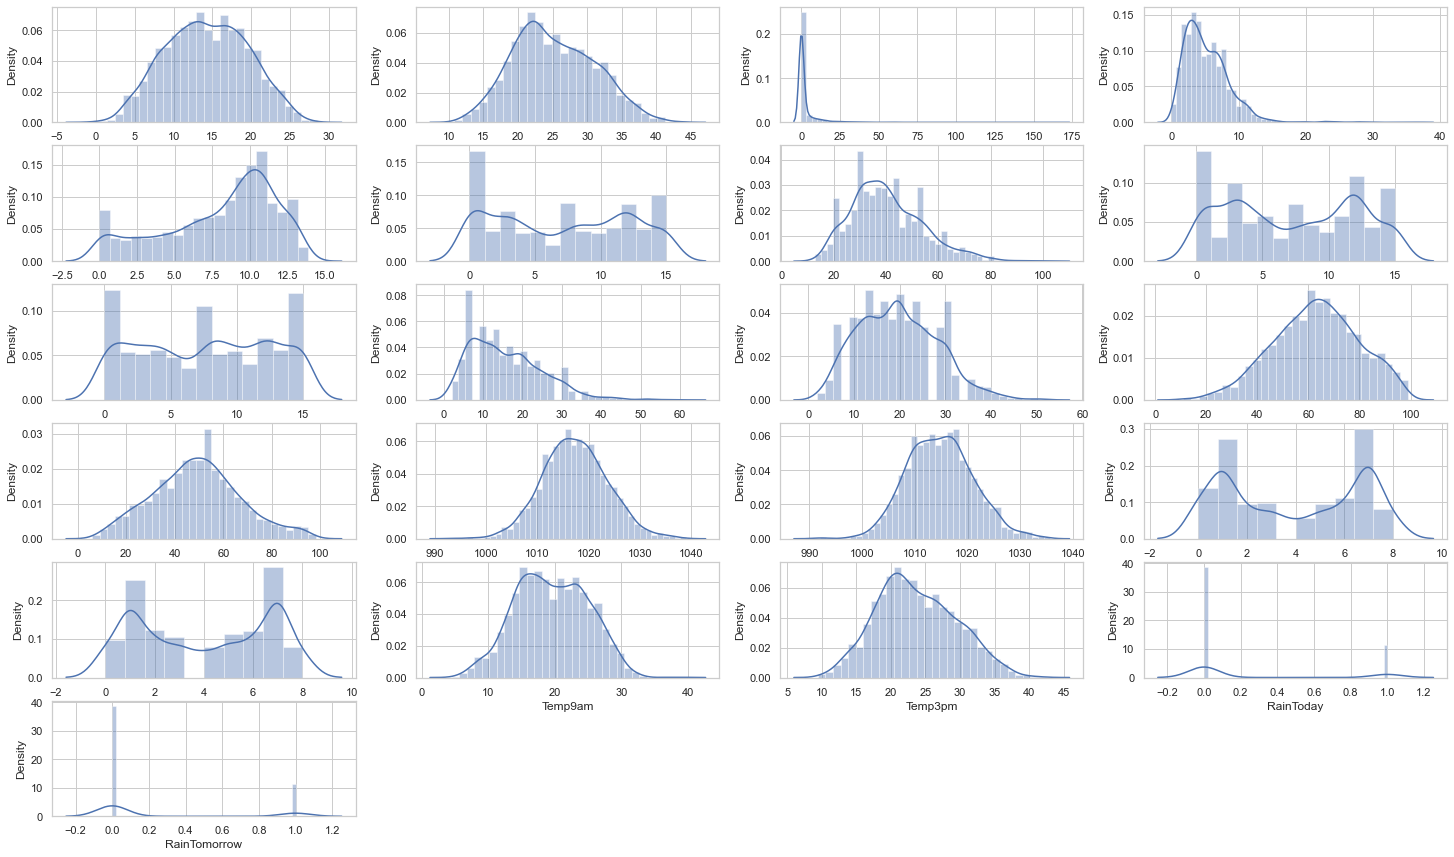

In [38]:
plt.figure(figsize=(25,20))
for i in enumerate(data_final.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(data_final[i[1]],color='b')

In [39]:
data_final.skew()

MinTemp          0.005567
MaxTemp          0.243080
Rainfall         7.812925
Evaporation      1.780093
Sunshine        -0.693365
WindGustDir      0.029905
WindGustSpeed    0.688402
WindDir9am       0.035593
WindDir3pm      -0.040820
WindSpeed9am     0.847445
WindSpeed3pm     0.368055
Humidity9am     -0.164805
Humidity3pm      0.177233
Pressure9am      0.089477
Pressure3pm      0.151169
Cloud9am        -0.003234
Cloud3pm        -0.040324
Temp9am          0.011047
Temp3pm          0.244781
RainToday        1.294264
RainTomorrow     1.292114
dtype: float64

In [40]:
# removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in data_final.columns:
    if abs(data_final.loc[:,i].skew())>0.5:
        data_final.loc[:,i]=PT.fit_transform(data_final.loc[:,i].values.reshape(-1,1))

In [41]:
data_final.skew()

MinTemp          0.005567
MaxTemp          0.243080
Rainfall         1.098228
Evaporation     -0.001383
Sunshine        -0.415091
WindGustDir      0.029905
WindGustSpeed   -0.005337
WindDir9am       0.035593
WindDir3pm      -0.040820
WindSpeed9am    -0.034853
WindSpeed3pm     0.368055
Humidity9am     -0.164805
Humidity3pm      0.177233
Pressure9am      0.089477
Pressure3pm      0.151169
Cloud9am        -0.003234
Cloud3pm        -0.040324
Temp9am          0.011047
Temp3pm          0.244781
RainToday        1.294264
RainTomorrow     1.292114
dtype: float64

In [42]:
#we can see here skewness is removed

In [83]:
WindGustDir_encode = LabelEncoder()
data_final['WindGustDir']=WindGustDir_encode.fit_transform(data_final['WindGustDir'])

WindDir9am_encode = LabelEncoder()
data_final['WindDir9am']=WindDir9am_encode.fit_transform(data_final['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
data_final['WindDir3pm']=WindDir3pm_encode.fit_transform(data_final['WindDir3pm'])

RainToday_encode = LabelEncoder()
data_final['RainToday']=RainToday_encode.fit_transform(data_final['RainToday'])

RainTomorrow_encode = LabelEncoder()
data_final['RainTomorrow']=RainTomorrow_encode.fit_transform(data_final["RainTomorrow"])

In [84]:
Y= data_final['RainTomorrow']
X = data_final.drop(['RainTomorrow'],axis=1)

In [85]:
column_names=X.columns.tolist()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80,shuffle=False)

In [87]:
#Appling featruring scaling

In [88]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
def plotErrors(k,train,cv):
       
    plt.plot(k, train, label='Train logloss')
    plt.plot(k, cv, label='CV logloss')
    plt.legend()
    plt.xlabel("log(C)= -log(λ)")
    plt.ylabel("Neg_Log Loss")
    plt.title("Error Plot for Train and Validation data")
    plt.grid()
    plt.show()

In [90]:
#Modeling the data using Logisitic Regression

In [91]:
#Hyper-parameter tuning

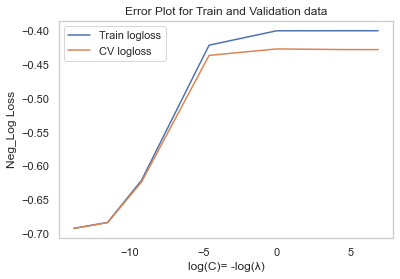

In [92]:
parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(X_train, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 

plotErrors(k=log_c,train=train_loss,cv=cv_loss)

In [93]:
clf = clf.best_estimator_
clf

LogisticRegression(C=1, class_weight='balanced')

In [94]:
#Trainig with the best value of C
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced')

In [95]:
#Model Evaluating

In [96]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, clf.predict_proba(X_train)[:,1])
test_loss  =log_loss(y_test, clf.predict_proba(X_test)[:,1])


print("Log_loss on train data is :{}".format(train_loss))
print("Log_loss on test data is :{}".format(test_loss))

Log_loss on train data is :0.40183975851327625
Log_loss on test data is :0.34423535152729995


In [97]:
#AUC metric

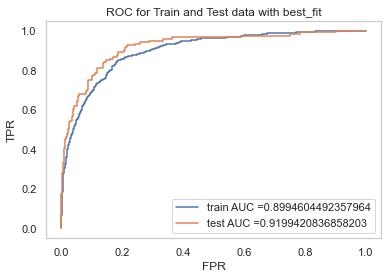

In [98]:
#Plotting AUC 
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

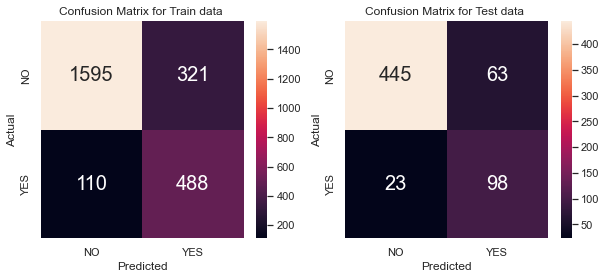

In [99]:
#ploting Confusion matrix
#Ref:https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
def plotcm (cm,ax,title):
    sns.heatmap(cm, ax=ax,annot=True,fmt='d',annot_kws={'size':20});
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 
    ax.set_title('Confusion Matrix for {} '.format(title)); 
    ax.xaxis.set_ticklabels(['NO', 'YES']); 
    ax.yaxis.set_ticklabels(['NO', 'YES']);


fig, subplt = plt.subplots(1, 2,figsize=(10, 4)) 
cm=confusion_matrix(y_train, clf.predict(X_train))
ax= subplt[0]
plotcm(cm,ax,'Train data')

cm=confusion_matrix(y_test, clf.predict(X_test))
ax= subplt[1]
plotcm(cm,ax,'Test data')

In [100]:
#Feature interpretation

In [101]:
clf.coef_[0]

array([-0.53326735, -0.15343859,  0.75681141,  0.33202132, -0.69174567,
        0.02189254,  0.87751245,  0.12509415, -0.04482611, -0.13850886,
       -0.05985014,  0.02629285,  1.30934374,  0.65428381, -0.87015148,
       -0.09247327,  0.46712697,  0.1203727 ,  0.51308774, -0.28591042])

In [112]:
feature_weights=sorted(zip(clf.coef_[0],column_names),reverse = True)

In [113]:
feature_weights

[(1.309343742642991, 'Humidity3pm'),
 (0.877512446605275, 'WindGustSpeed'),
 (0.7568114101368703, 'Rainfall'),
 (0.6542838110243027, 'Pressure9am'),
 (0.5130877365609057, 'Temp3pm'),
 (0.46712696756910455, 'Cloud3pm'),
 (0.33202131506356725, 'Evaporation'),
 (0.12509414990694834, 'WindDir9am'),
 (0.12037270426683552, 'Temp9am'),
 (0.02629284574138152, 'Humidity9am'),
 (0.021892543127621535, 'WindGustDir'),
 (-0.04482611441873064, 'WindDir3pm'),
 (-0.059850138837942164, 'WindSpeed3pm'),
 (-0.09247326762103972, 'Cloud9am'),
 (-0.13850885667386126, 'WindSpeed9am'),
 (-0.15343858665377824, 'MaxTemp'),
 (-0.28591042065489203, 'RainToday'),
 (-0.5332673453226263, 'MinTemp'),
 (-0.6917456729234542, 'Sunshine'),
 (-0.8701514792359945, 'Pressure3pm')]

In [114]:
#Higher weight value is important

In [115]:
def will_rain_fall_for_this_conditions(xq):
    
    xq["WindGustDir"]=WindGustDir_encode.transform([xq["WindGustDir"]])
    xq["WindDir9am"]=WindDir9am_encode.transform([xq["WindDir9am"]])
    xq["WindDir3pm"]=WindDir3pm_encode.transform([xq["WindDir3pm"]])
    xq["RainToday"]=RainToday_encode.transform([xq["RainToday"]])
    xq=np.array(list((xq.values())))
    final_xq = scaler.transform(xq.reshape(1, -1))
    chance=clf.predict_proba(final_xq)[:,1]
    if chance>=0.5:
        print("Yes, there is a {} % chance of rain can fall on tommorow ".format(chance*100))
    else:
        print("No, there is only {}% chance of rainfall hence we cannot expect rain on tommorow ".format(chance*100))
    print("Because today's Humidity at 3pm ={}%,Atmosphereic Pressure at 9am={}millibars,and Wind Gust Speed ={}km/hr, which are very good sign for rainfall"
          .format(Humidity3pm,Pressure9am,WindGustSpeed))

In [125]:
#Giving one query point here

MinTemp   = 26.2
MaxTemp   = 31.7
Rainfall   = 2.8
Evaporation   = 5.4
Sunshine   = 3.5
WindGustDir   = 15
WindGustSpeed   = 57
WindDir9am   = 15
WindDir3pm   = 2
WindSpeed9am   = 20
WindSpeed3pm   = 13
Humidity9am   = 81
Humidity3pm   = 95
Pressure9am   = 1007.2
Pressure3pm   = 1006.1
Cloud9am   = 7
Cloud3pm   = 8
Temp9am   = 28.8
Temp3pm   = 25.4
RainToday   =1

In [126]:
point = [MinTemp,MaxTemp,Rainfall,
         Evaporation,Sunshine,WindGustDir,
         WindGustSpeed,WindDir9am,WindDir3pm,
         WindSpeed9am,WindSpeed3pm,Humidity9am,
         Humidity3pm,Pressure9am,Pressure3pm,
         Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday]

xq=dict()
for i,name in enumerate(column_names):
    xq[name]=point[i]

In [127]:
#Interpretting the Classifer result

In [128]:
will_rain_fall_for_this_conditions(xq)

Yes, there is a [100.] % chance of rain can fall on tommorow 
Because today's Humidity at 3pm =95%,Atmosphereic Pressure at 9am=1007.2millibars,and Wind Gust Speed =57km/hr, which are very good sign for rainfall
